<a href="https://colab.research.google.com/github/Juanriver14/Datasets/blob/main/Test_SVM_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np    
import pandas as pd
# For optimization We’ll use the SciPy optimize package to find the optimal values
# of Lagrange multipliers, and compute the soft margin and the separating hyperplane.
from scipy.optimize import Bounds, BFGS                     
from scipy.optimize import LinearConstraint, minimize   
# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
# For generating dataset
import sklearn.datasets as dt

https://raw.githubusercontent.com/Juanriver14/Datasets/main/SPECTF_train.csv

https://raw.githubusercontent.com/Juanriver14/Datasets/main/SPECTF_test.csv

In [ ]:

url = 'https://raw.githubusercontent.com/Juanriver14/Datasets/main/SPECTF_test.csv'
df = pd.read_csv(url)



In [ ]:
#We also need the following constant to detect all alphas numerically close to zero, so we need to define our own threshold for zero.
ZERO = 1e-7

In [ ]:

df.head

<bound method NDFrame.head of      1   67   68   73   78   65   63   67.1   60   63.1  ...   61.2   56.1  \
0    1   75   74   71   71   62   58     70   64     71  ...     66     62   
1    1   83   64   66   67   67   74     74   72     64  ...     67     64   
2    1   72   66   65   65   64   61     71   78     73  ...     69     68   
3    1   62   60   69   61   63   63     70   68     70  ...     66     66   
4    1   68   63   67   67   65   72     74   72     70  ...     70     70   
..  ..  ...  ...  ...  ...  ...  ...    ...  ...    ...  ...    ...    ...   
181  0   74   69   75   70   70   74     77   77     65  ...     66     67   
182  0   72   61   64   66   64   59     68   66     76  ...     69     64   
183  0   75   73   72   77   68   67     76   73     67  ...     70     67   
184  0   59   62   72   74   66   66     74   76     63  ...     65     71   
185  0   64   66   68   71   62   64     74   73     63  ...     70     69   

      76.3   75.1   74.1   77   7

In [ ]:
dft=np.array(df)

In [ ]:
dft

array([[ 1, 75, 74, ..., 58, 57, 52],
       [ 1, 83, 64, ..., 64, 43, 42],
       [ 1, 72, 66, ..., 63, 58, 60],
       ...,
       [ 0, 75, 73, ..., 75, 67, 71],
       [ 0, 59, 62, ..., 76, 70, 70],
       [ 0, 64, 66, ..., 64, 57, 54]])

In [ ]:
dat = df.iloc[:,1:].values



In [ ]:
dat

array([[75, 74, 71, ..., 58, 57, 52],
       [83, 64, 66, ..., 64, 43, 42],
       [72, 66, 65, ..., 63, 58, 60],
       ...,
       [75, 73, 72, ..., 75, 67, 71],
       [59, 62, 72, ..., 76, 70, 70],
       [64, 66, 68, ..., 64, 57, 54]])

In [ ]:
labels = df.iloc[:,0].values

In [ ]:
labels


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#Defining the Data Points and Labels
if a string of alphas is given to the plotting function, then it will also label all support vectors with their corresponding alpha values. Just to recall support vectors are those points for which .

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


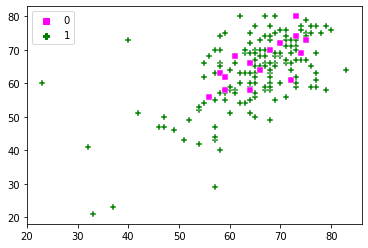

In [ ]:
def plot_x(x, t, alpha=[], C=0):
    sns.scatterplot(dat[:,0], dat[:, 1], style=labels,
    hue=labels, markers=['s', 'P'],
    palette=['magenta', 'green'])
    if len(alpha) > 0:
        alpha_str = np.char.mod('%.1f', np.round(alpha, 1))
        ind_sv = np.where(alpha > ZERO)[0]
        for i in ind_sv:   
            plt.gca().text(dat[i,0], dat[i, 1]-.25, alpha_str[i] )
 
                  
plot_x(dat, labels)

#Defining the Objective Function
Our objective function is Ld defined above, which has to be maximized. As we are using the minimize() function, we have to multiply  by Ld (-1) to maximize it. Its implementation is given below. The first parameter for the objective function is the variable w.r.t. which the optimization takes place. We also need the training points and the corresponding labels as additional arguments.



In [ ]:

# Objective function
def lagrange_dual(alpha, x, t):
    result = 0
    ind_sv = np.where(alpha > ZERO)[0]
    for i in ind_sv:
        for k in ind_sv:
            result = result + alpha[i]*alpha[k]*t[i]*t[k]*np.dot(x[i, :], x[k, :]) 
    result = 0.5*result - sum(alpha)     
    return result

Defining the Bounds
The bounds on alpha are defined using the Bounds() method. All alphas are constrained to lie between 0 and C . Here is an example for C=10 .

In [ ]:
linear_constraint = LinearConstraint(labels, [0], [0])
print(linear_constraint)

In [ ]:
bounds_alpha = Bounds(np.zeros(dat.shape[0]), np.full(dat.shape[0], 10))
print(bounds_alpha)

Bounds(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 1

#Defining the Function to Find Alphas
find the optimal values of alpha when given the parameters x, t, and C. The objective function requires the additional arguments x and t, which are passed via args in minimize().

In [ ]:
def optimize_alpha(x, t, C):
    m, n = x.shape
    np.random.seed(1)
    # Initialize alphas to random values
    alpha_0 = np.random.rand(m)*C
    # Define the constraint
    linear_constraint = LinearConstraint(t, [0], [0])
    # Define the bounds
    bounds_alpha = Bounds(np.zeros(m), np.full(m, C))
    # Find the optimal value of alpha
    result = minimize(lagrange_dual, alpha_0, args = (x, t), method='trust-constr', 
                      hess=BFGS(), constraints=[linear_constraint],
                      bounds=bounds_alpha)
    # The optimized value of alpha lies in result.x
    alpha = result.x
    return alpha

#Determining the Hyperplane
The expression for the hyperplane is given by: W t X + W0 = 0 

In [ ]:
def get_w(alpha, t, x):
    m = len(x)
    # Get all support vectors
    w = np.zeros(x.shape[1])
    for i in range(m):
        w = w + alpha[i]*t[i]*x[i, :]        
    return w
 
def get_w0(alpha, t, x, w, C):
    C_numeric = C-ZERO
    # Indices of support vectors with alpha<C
    ind_sv = np.where((alpha > ZERO)&(alpha < C_numeric))[0]
    w0 = 0.0
    for s in ind_sv:
        w0 = w0 + t[s] - np.dot(x[s, :], w)
    # Take the average    
    w0 = w0 / len(ind_sv)
    return w0

In [ ]:
#Classifying Test Points
def classify_points(x_test, w, w0):
    # get y(x_test)
    predicted_labels = np.sum(x_test*w, axis=1) + w0
    predicted_labels = np.sign(predicted_labels)
    # Assign a label arbitrarily a +1 if it is zero
    predicted_labels[predicted_labels==0] = 1
    return predicted_labels
 
def misclassification_rate(labels, predictions):
    total = len(labels)
    errors = sum(labels != predictions)
    return errors/total*100

In [ ]:
#Plotting the Margin and Hyperplane

def plot_hyperplane(w, w0):
    x_coord = np.array(plt.gca().get_xlim())
    y_coord = -w0/w[1] - w[0]/w[1] * x_coord
    plt.plot(x_coord, y_coord, color='red')
 
def plot_margin(w, w0):
    x_coord = np.array(plt.gca().get_xlim())
    ypos_coord = 1/w[1] - w0/w[1] - w[0]/w[1] * x_coord
    plt.plot(x_coord, ypos_coord, '--', color='green') 
    yneg_coord = -1/w[1] - w0/w[1] - w[0]/w[1] * x_coord
    plt.plot(x_coord, yneg_coord, '--', color='magenta')

#Powering Up The SVM
It’s now time to run the SVM. The function display_SVM_result() will help us visualize everything. We’ll initialize alpha to random values, define C and find the best values of alpha in this function. We’ll also plot the hyperplane, the margin and the data points. The support vectors would also be labelled by their corresponding alpha value. The title of the plot would be the percentage of errors and number of support vectors.

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_trustregion_constr/projections.py:182: UserWarning: Singular Jacobian matrix. Using SVD decomposition to perform the factorizations.
  warn('Singular Jacobian matrix. Using SVD decomposition to ' +
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


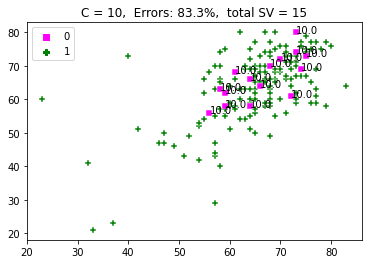

In [ ]:

def display_SVM_result(x, t, C):
    # Get the alphas
    alpha = optimize_alpha(x, t, C)   
    # Get the weights
    w = get_w(alpha, t, x)
    w0 = get_w0(alpha, t, x, w, C)
    plot_x(x, t, alpha, C)
    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()
    plot_hyperplane(w, w0)
    plot_margin(w, w0)
    plt.xlim(xlim)
    plt.ylim(ylim)
    # Get the misclassification error and display it as title
    predictions = classify_points(x, w, w0)
    err = misclassification_rate(t, predictions)
    title = 'C = ' + str(C) + ',  Errors: ' + '{:.1f}'.format(err) + '%'
    title = title + ',  total SV = ' + str(len(alpha[alpha > ZERO]))
    plt.title(title)
    
display_SVM_result(dat, labels, 10)    
plt.show()

#The Effect of C


If you change the value of C to infinite, then the soft margin turns into a hard margin, with no toleration for errors. The problem we defined above is not solvable in this case. Let’s generate an artificial set of points and look at the effect of C on classification. To understand the entire problem, we’ll use a simple dataset, where the positive and negative examples are separable.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


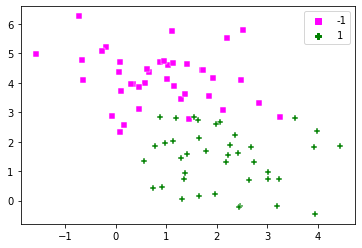

In [ ]:

dat, labels = dt.make_blobs(n_samples=[40,40],
                           cluster_std=1,
                           random_state=0)
labels[labels==0] = -1
plot_x(dat, labels)

Now let’s define different values of C

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)
/usr/local/lib/python3.7

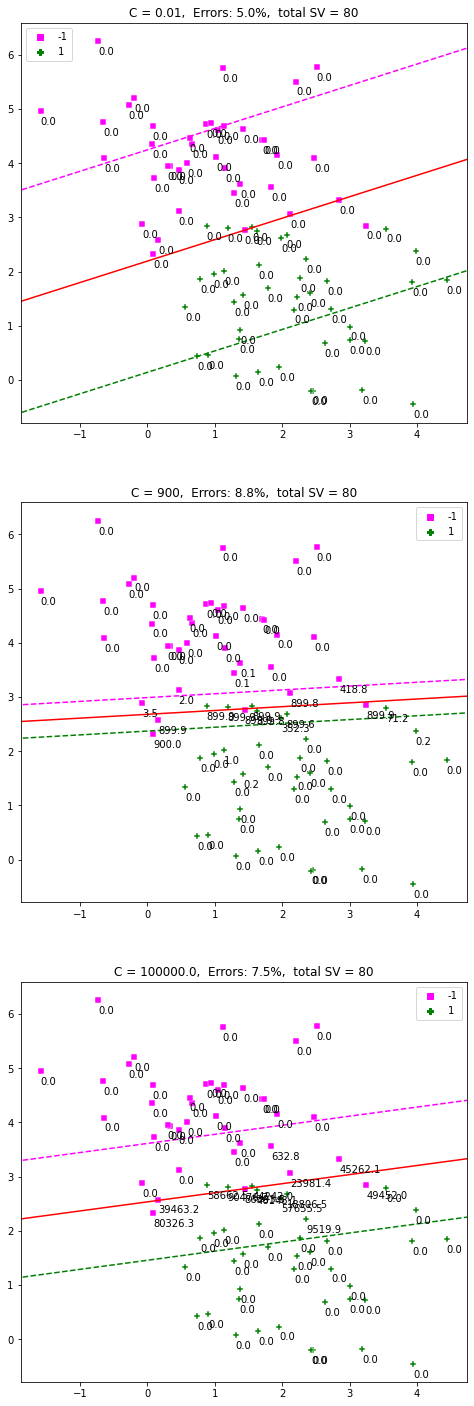

In [ ]:

fig = plt.figure(figsize=(8,25))
 
i=0
C_array = [1e-2, 900, 1e5]
 
for C in C_array:
    fig.add_subplot(311+i)    
    display_SVM_result(dat, labels, C)  
    i = i + 1

The above is a nice example, which shows that increasing , decreases the margin. A high value of  adds a stricter penalty on errors. A smaller value allows a wider margin and more misclassification errors. Hence,  defines a tradeoff between the maximization of margin and classification errors

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)
/usr/local/lib/python3.7

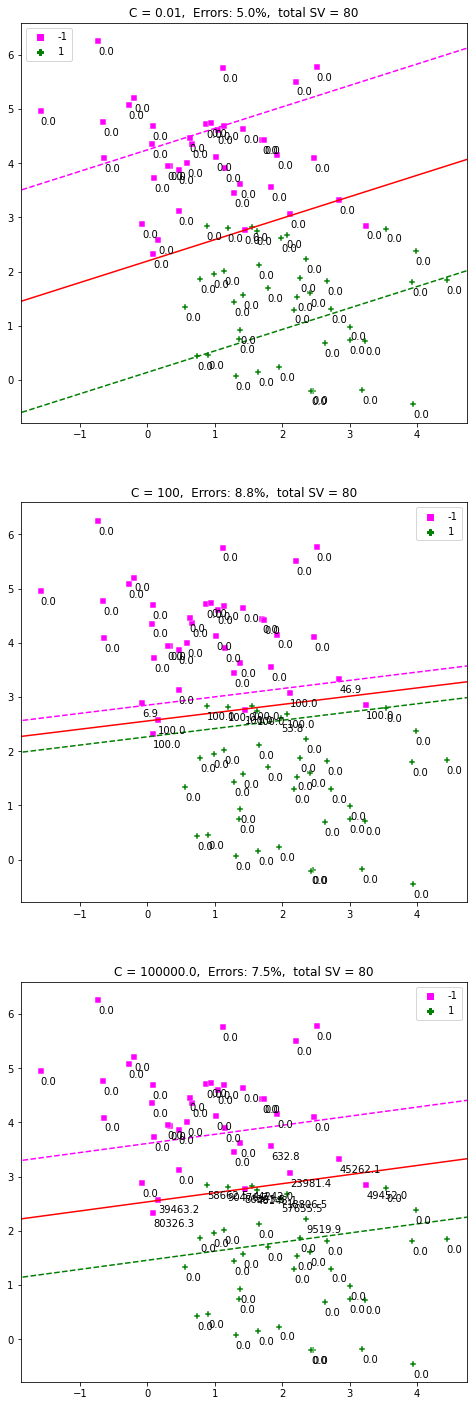

In [22]:

fig = plt.figure(figsize=(8,25))
 
i=0
C_array = [1e-2, 100, 1e5]
 
for C in C_array:
    fig.add_subplot(311+i)    
    display_SVM_result(dat, labels, C)  
    i = i + 1